In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
!pip install matplotlib

In [4]:
# reading the data 
data=pd.read_csv("D:\\data\\bank.csv",sep=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


{'whiskers': [<matplotlib.lines.Line2D at 0x273fe6e14f0>,
 'caps': [<matplotlib.lines.Line2D at 0x273fe6e1b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x273fe6e1220>],
 'medians': [<matplotlib.lines.Line2D at 0x273fe6f4070>],
 'fliers': [<matplotlib.lines.Line2D at 0x273fe6f4340>],
 'means': []}

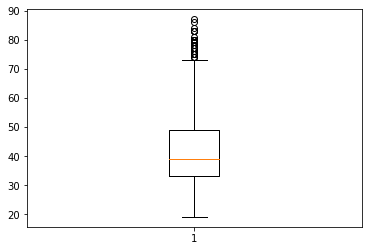

In [13]:
plt.boxplot(data["age"])

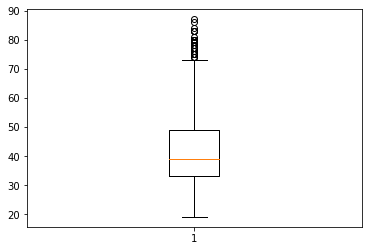

In [15]:
plt.boxplot(data["age"])
plt.show()
# black line is outlier
# red line is 50% percentile median

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

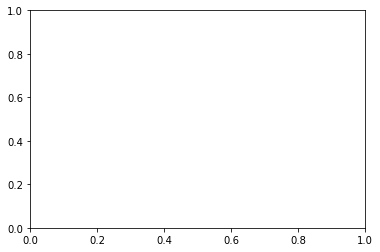

In [18]:
plt.boxplot(data["job"])
plt.show()
# job have categorical data 


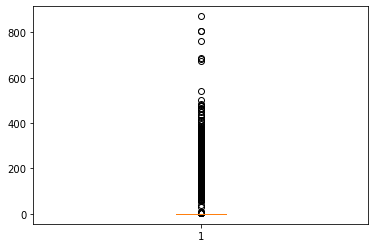

In [19]:
plt.boxplot(data["pdays"])
plt.show()

In [20]:
# step1 find Q1,Q2,Q3
# step2 IQR
# step3 threshold

In [21]:
Q1=np.percentile(data["age"],25)
Q2=np.percentile(data["age"],50)
Q3=np.percentile(data["age"],75)
print("25 percentile value is ",Q1)
print("50 percentile value is ",Q2)
print("75 percentile value is ",Q3)

25 percentile value is  33.0
50 percentile value is  39.0
75 percentile value is  49.0


In [22]:
Q1=np.quantile(data["age"],0.25)
Q2=np.quantile(data["age"],0.50)
Q3=np.quantile(data["age"],0.75)
print("0.25 quantile value is ",Q1)
print("0.50 quantile value is ",Q2)
print("0.75 quantile value is ",Q3)

0.25 quantile value is  33.0
0.50 quantile value is  39.0
0.75 quantile value is  49.0


In [23]:
IQR=Q3-Q1
IQR

16.0

In [24]:
l_b = Q1-1.5*IQR
u_b=Q3+1.5*IQR
print("lower bound value is ",l_b)
print("upper bound value is ",u_b)

lower bound value is  9.0
upper bound value is  73.0


In [26]:
data["age"]>u_b # asking 

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Name: age, Length: 4521, dtype: bool

In [28]:
data[data["age"]>u_b]
# these values are upper outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
129,77,retired,divorced,tertiary,no,4659,no,no,cellular,14,apr,161,1,-1,0,unknown,yes
166,78,housemaid,married,secondary,no,499,no,no,telephone,16,mar,80,4,-1,0,unknown,no
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
412,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
477,77,retired,married,tertiary,no,7802,no,no,telephone,4,may,421,1,92,2,success,yes
573,81,retired,married,secondary,no,1,no,no,cellular,19,aug,65,5,-1,0,unknown,no
633,83,retired,married,secondary,no,0,no,no,cellular,18,mar,140,10,-1,0,unknown,no
688,80,management,married,primary,no,6483,no,no,telephone,19,oct,123,1,-1,0,unknown,no
1126,77,retired,married,secondary,no,610,no,no,cellular,13,aug,766,3,-1,0,unknown,no


In [29]:
data[data["age"]<l_b]
# these values are lower outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [30]:
data[(data["age"]>u_b)|(data["age"]<l_b)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
129,77,retired,divorced,tertiary,no,4659,no,no,cellular,14,apr,161,1,-1,0,unknown,yes
166,78,housemaid,married,secondary,no,499,no,no,telephone,16,mar,80,4,-1,0,unknown,no
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
412,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
477,77,retired,married,tertiary,no,7802,no,no,telephone,4,may,421,1,92,2,success,yes
573,81,retired,married,secondary,no,1,no,no,cellular,19,aug,65,5,-1,0,unknown,no
633,83,retired,married,secondary,no,0,no,no,cellular,18,mar,140,10,-1,0,unknown,no
688,80,management,married,primary,no,6483,no,no,telephone,19,oct,123,1,-1,0,unknown,no
1126,77,retired,married,secondary,no,610,no,no,cellular,13,aug,766,3,-1,0,unknown,no


In [31]:
data[(data["age"]>u_b)|(data["age"]<l_b)].values # giving all values 
# but we need only specificed value

array([[78, 'retired', 'divorced', 'primary', 'no', 229, 'no', 'no',
        'telephone', 22, 'oct', 97, 1, -1, 0, 'unknown', 'yes'],
       [77, 'retired', 'divorced', 'tertiary', 'no', 4659, 'no', 'no',
        'cellular', 14, 'apr', 161, 1, -1, 0, 'unknown', 'yes'],
       [78, 'housemaid', 'married', 'secondary', 'no', 499, 'no', 'no',
        'telephone', 16, 'mar', 80, 4, -1, 0, 'unknown', 'no'],
       [75, 'retired', 'married', 'secondary', 'no', 3771, 'no', 'no',
        'telephone', 15, 'apr', 185, 1, 181, 2, 'success', 'yes'],
       [75, 'retired', 'divorced', 'tertiary', 'no', 3810, 'yes', 'no',
        'cellular', 16, 'nov', 262, 1, 183, 1, 'failure', 'yes'],
       [77, 'retired', 'married', 'tertiary', 'no', 7802, 'no', 'no',
        'telephone', 4, 'may', 421, 1, 92, 2, 'success', 'yes'],
       [81, 'retired', 'married', 'secondary', 'no', 1, 'no', 'no',
        'cellular', 19, 'aug', 65, 5, -1, 0, 'unknown', 'no'],
       [83, 'retired', 'married', 'secondary', 'no',

In [32]:
data[(data["age"]>u_b)|(data["age"]<l_b)]["age"].values

array([78, 77, 78, 75, 75, 77, 81, 83, 80, 77, 75, 80, 83, 75, 79, 77, 86,
       78, 77, 74, 80, 74, 80, 80, 75, 76, 79, 77, 87, 79, 76, 80, 79, 74,
       75, 84, 83, 83], dtype=int64)

In [33]:
data[(data["age"]>u_b)|(data["age"]<l_b)]["pdays"].values

array([ -1,  -1,  -1, 181, 183,  92,  -1,  -1,  -1,  -1,  -1,  64, 140,
        -1,  -1,  60, 101,  -1,  89,  -1, 118, 104,  -1,  -1, 190,  -1,
       272,  94,  -1,  -1,  -1, 189, 450,  -1,  -1,  -1,  77,  -1],
      dtype=int64)

In [34]:
data[(data["age"]>u_b)|(data["age"]<l_b)]["job"]
# age vs job 

36          retired
129         retired
166       housemaid
199         retired
412         retired
477         retired
573         retired
633         retired
688      management
1126        retired
1230        retired
1312        retired
1349        retired
1415        retired
1422        retired
1437        retired
1866        retired
1949        retired
1956        retired
2014        retired
2070        retired
2678        retired
2848        retired
2896        retired
3157    blue-collar
3193        retired
3202        retired
3205        retired
3311        retired
3360        retired
3495        retired
3690      housemaid
3750        retired
3786        retired
4047        retired
4108        retired
4323        retired
4388        retired
Name: job, dtype: object

In [36]:
data[(data["age"]>u_b)|(data["age"]<l_b)]["job"].values

array(['retired', 'retired', 'housemaid', 'retired', 'retired', 'retired',
       'retired', 'retired', 'management', 'retired', 'retired',
       'retired', 'retired', 'retired', 'retired', 'retired', 'retired',
       'retired', 'retired', 'retired', 'retired', 'retired', 'retired',
       'retired', 'blue-collar', 'retired', 'retired', 'retired',
       'retired', 'retired', 'retired', 'housemaid', 'retired', 'retired',
       'retired', 'retired', 'retired', 'retired'], dtype=object)